Bài tập Lab 5


   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5 

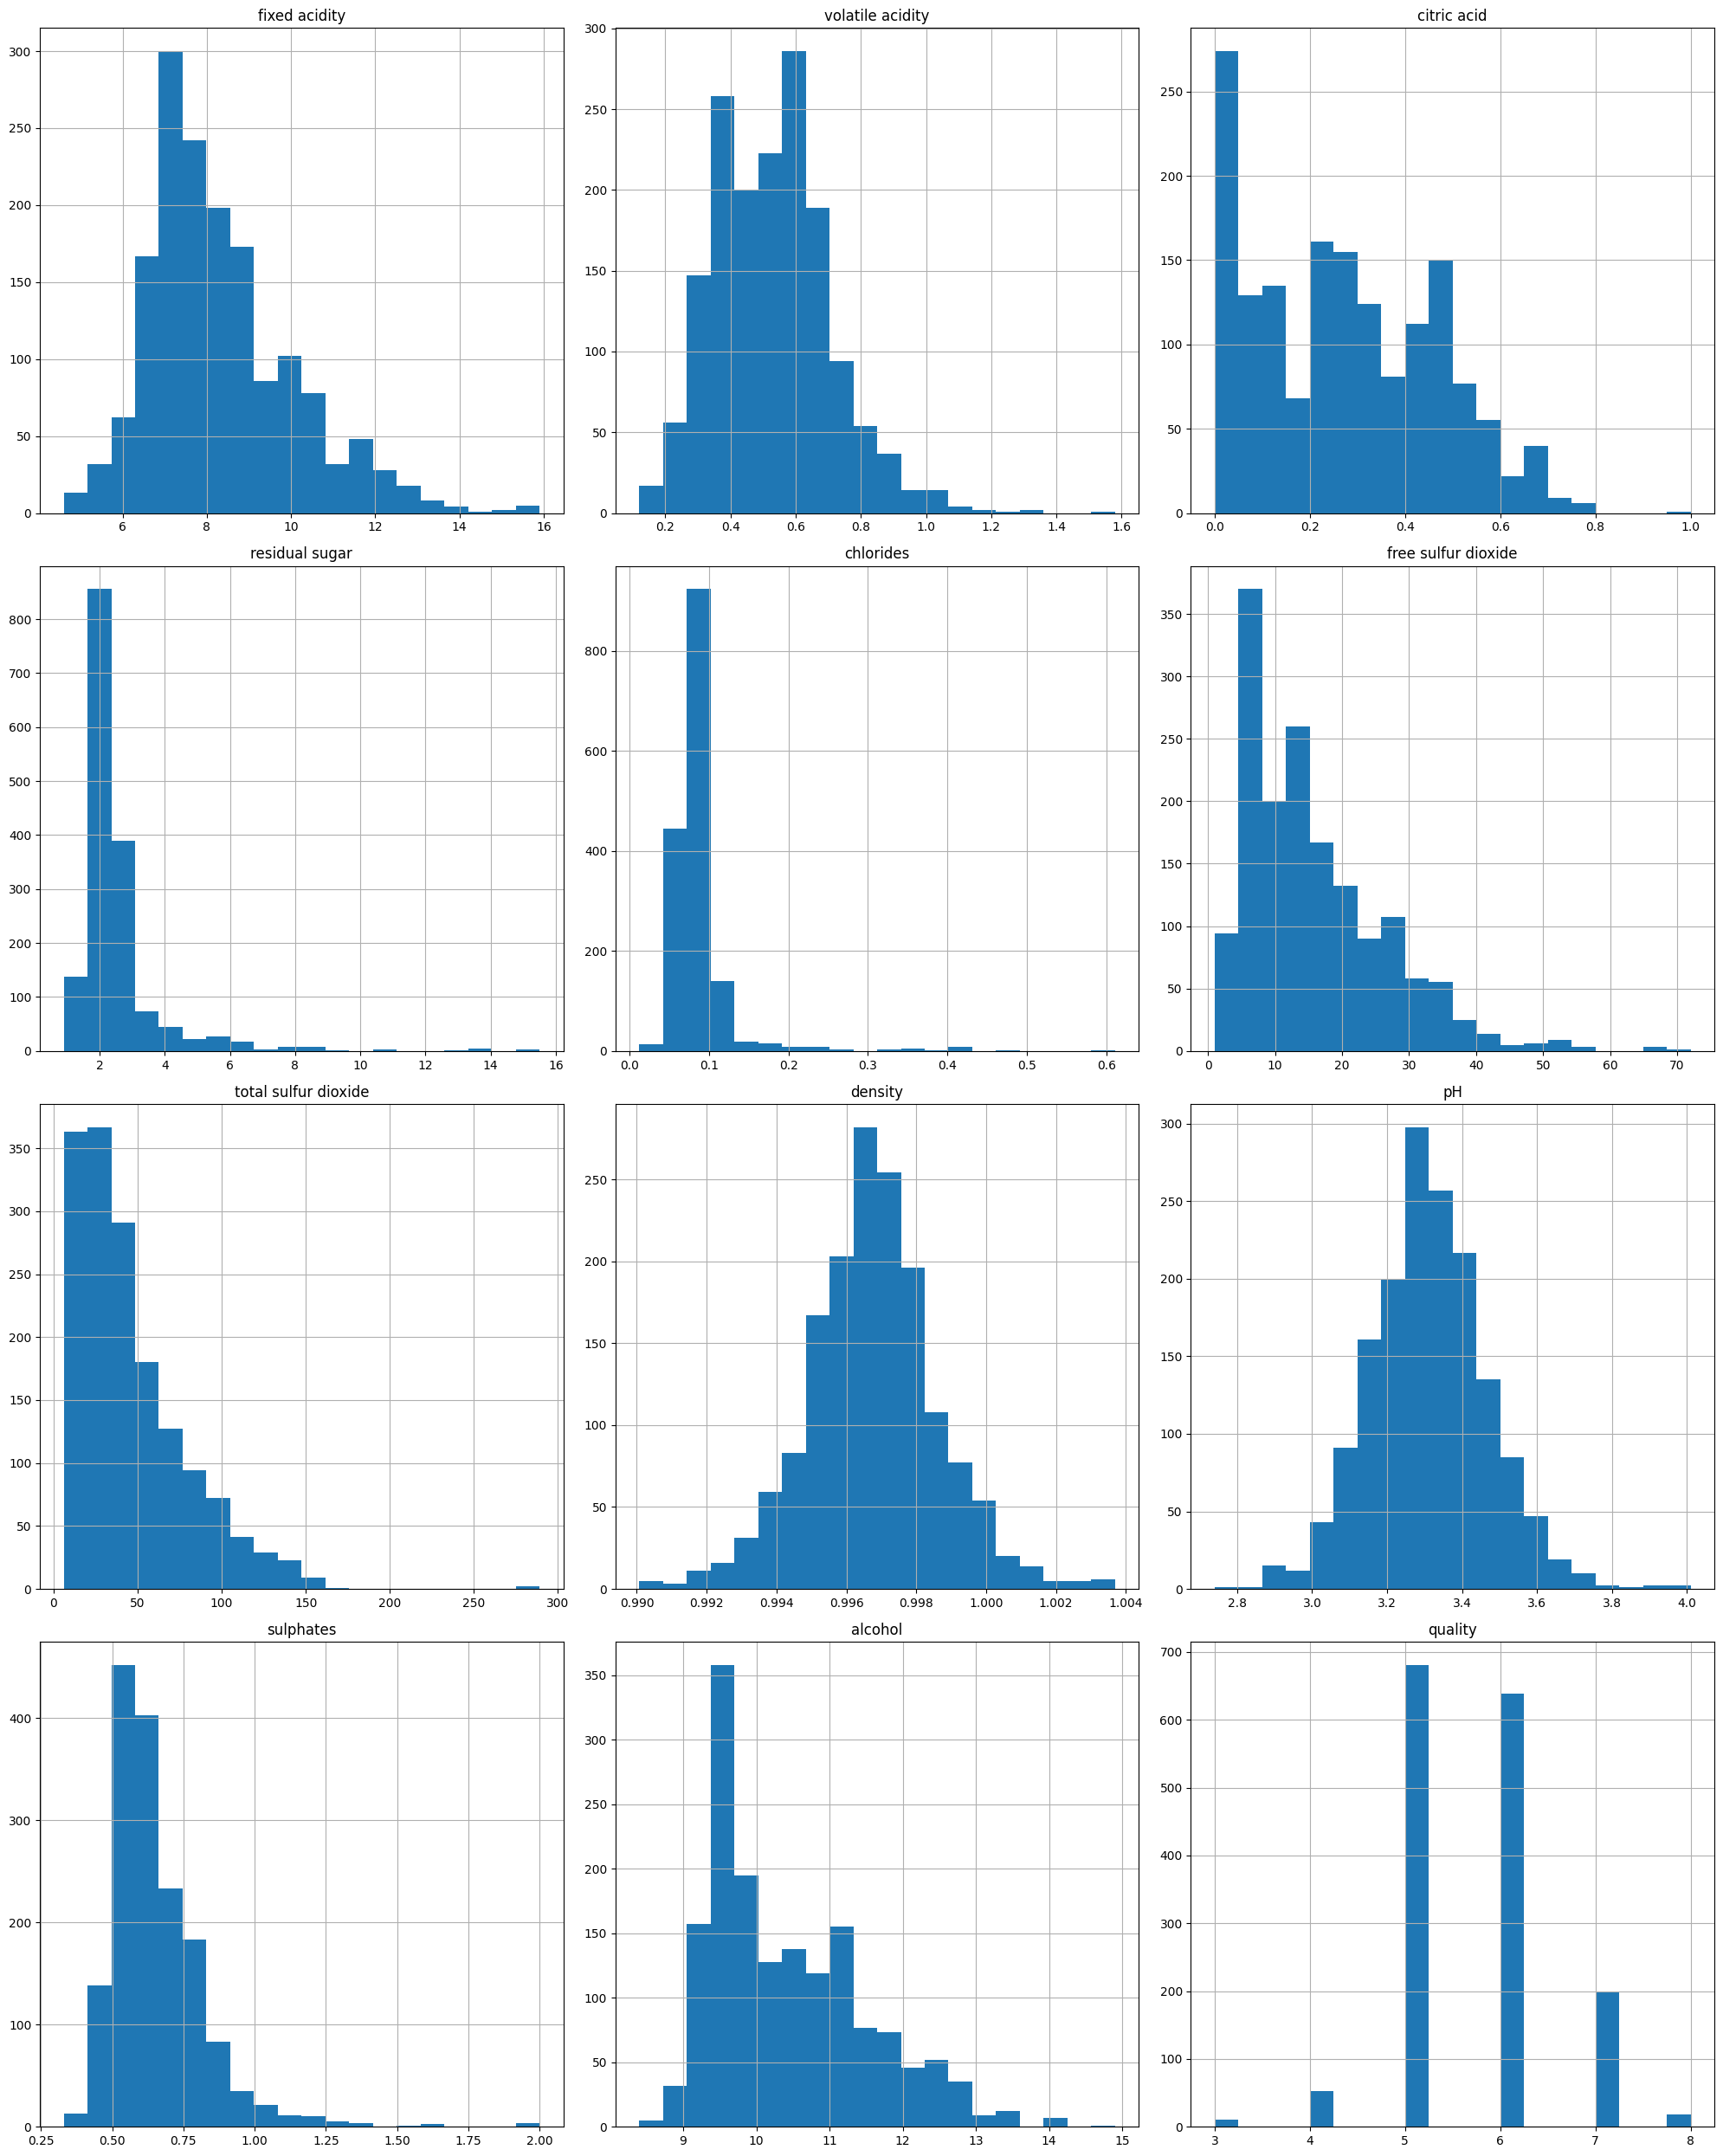

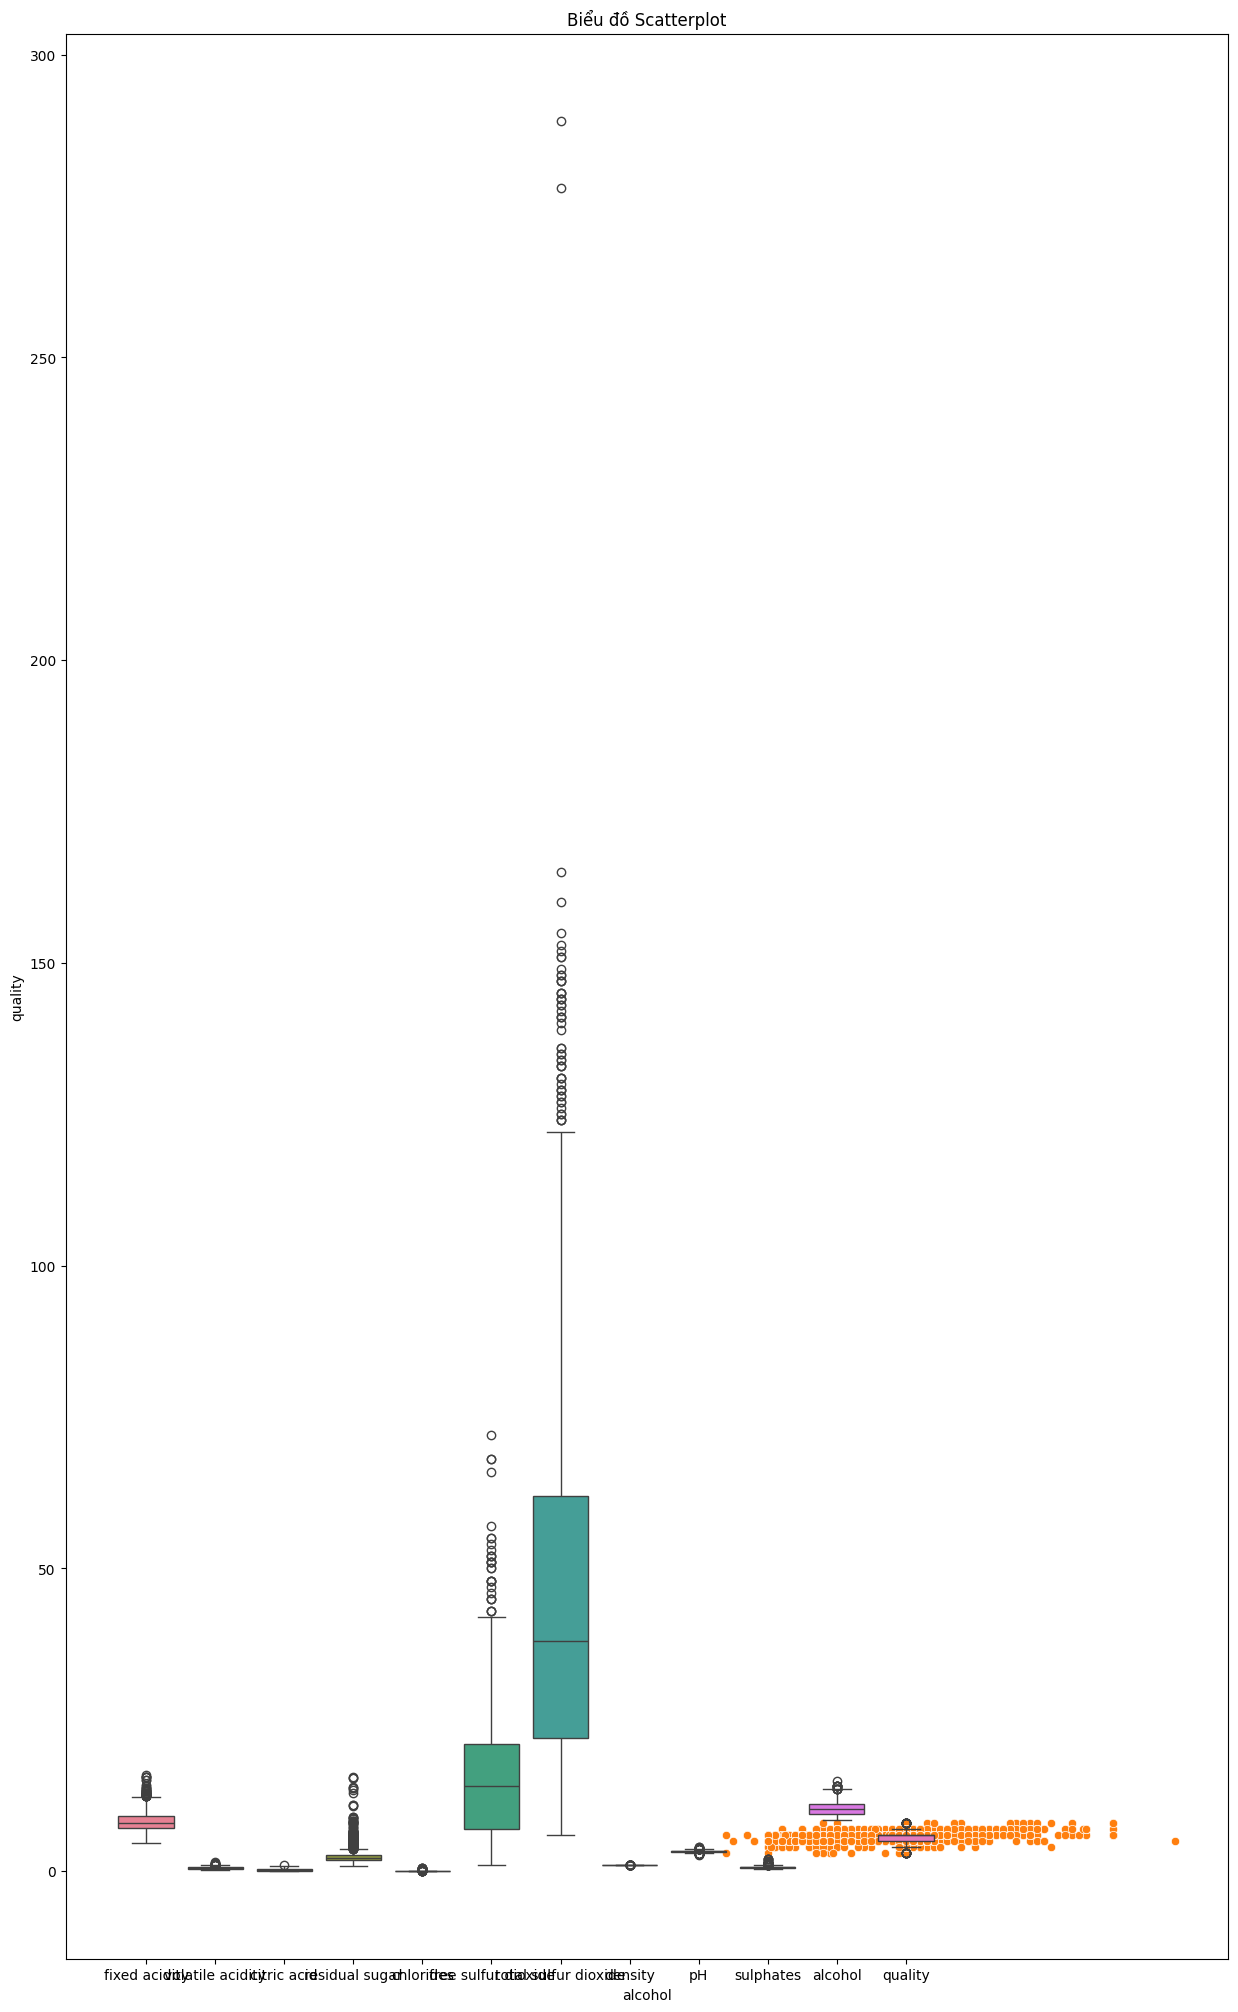

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Đọc file CSV

data = pd.read_csv('winequality-red.csv', delimiter=";")
df = pd.read_csv('winequality-red.csv', delimiter=";")

# Hiển thị 5 dòng đầu tiên
print(data.head())

##Thống kê
print(data.describe())

##Kiểm tra
print(data.columns)

#2.1 Kiểm tra giá trị thiếu
print(data.isnull().sum())
#2.2 Vẽ histogram
data.hist(bins= 20, figsize=(20,25))
plt.tight_layout()
plt.show()
 
#2.3 Vẽ boxplot cho tất cả các biến và nhận xét
plt.figure(figsize=(15, 25))
sns.boxplot(data = df)

#2.4 Vẽ Scatterplot cho alcohol và quality
sns.scatterplot(x="alcohol", y= "quality", data = df)
plt.xlabel("Acohol")
plt.ylabel("Quality")
plt.title("Biểu đồ Scatterplot")
plt.show()

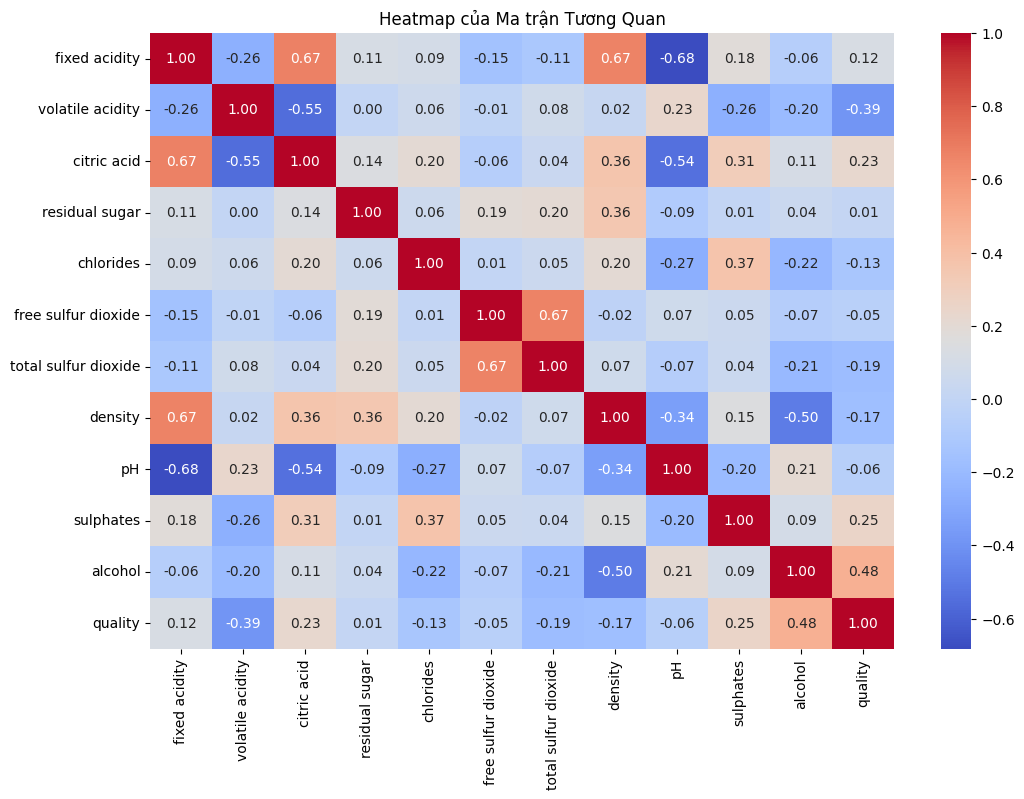

Kích thước tập huấn luyện: (1279, 12)
Kích thước tập kiểm tra: (320, 12)


In [14]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Đọc dữ liệu từ file CSV
df = pd.read_csv('winequality-red.csv', sep=';')

# #3 Tính toán ma trận tương quan và vẽ heatmap của ma trận tương quan
corr = df.corr()

# Vẽ heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Heatmap của Ma trận Tương Quan')
plt.show()

# #4 Chia tập dữ liệu thành tập huấn luyện và kiểm tra
np.random.seed(42)
df = df.sample(frac=1).reset_index(drop=True)  # Xáo trộn dữ liệu

# Tính kích thước tập dữ liệu cho huấn luyện
train_size = int(0.8 * len(df))
train_df = df.iloc[:train_size]  # Tập huấn luyện
test_df = df.iloc[train_size:]    # Tập kiểm tra

# In kích thước của tập huấn luyện và tập kiểm tra
print("Kích thước tập huấn luyện:", train_df.shape)
print("Kích thước tập kiểm tra:", test_df.shape)

In [17]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

# 1. Đọc dữ liệu
df = pd.read_csv('winequality-red.csv', sep=';')

# 2. Tách biến mục tiêu và biến dự đoán
X = df.drop('quality', axis=1)
y = df['quality']

# 3. Chia tập dữ liệu thành tập huấn luyện và tập kiểm tra
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 4. Khởi tạo StandardScaler
scaler = StandardScaler()

# 5. Chuẩn hóa dữ liệu huấn luyện
X_train_scaled = scaler.fit_transform(X_train)

# 6. Chuẩn hóa dữ liệu kiểm tra
X_test_scaled = scaler.transform(X_test)

# 7. Khởi tạo mô hình hồi quy tuyến tính
model = LinearRegression()

# 8. Huấn luyện mô hình
model.fit(X_train_scaled, y_train)

# 9. Dự đoán trên tập kiểm tra
y_pred = model.predict(X_test_scaled)

# 10. In kết quả dự đoán
print("Dự đoán chất lượng rượu trên tập kiểm tra:", y_pred)


Dự đoán chất lượng rượu trên tập kiểm tra: [5.34666441 5.05631345 5.66446972 5.46451484 5.72518476 5.27928659
 5.03421667 5.12623347 5.74534288 5.68665032 6.13959677 5.23386892
 5.54991474 5.25825299 5.44810502 6.46828999 5.15018088 5.59105157
 6.5560658  5.32255751 5.3918385  5.19610791 5.94475739 6.36197631
 5.35484893 5.41907575 6.36483321 5.35121573 5.172392   6.16987311
 5.25263058 5.50657406 5.75422105 5.39101712 5.45331031 5.02757499
 6.16173243 5.68661555 5.6486077  6.165471   5.52872593 5.24414488
 6.17724727 5.16500868 5.87598332 5.81317121 6.41982782 5.6059474
 5.15232137 5.55634632 5.16044852 5.10449459 5.58371721 6.33425313
 4.95134985 4.98364804 6.01041999 5.40809804 5.83802638 5.2486897
 5.60717482 5.96630957 5.27619063 5.30380113 6.4949309  5.42033967
 6.34273471 5.24618531 6.41317317 5.31237924 6.41746963 4.74315748
 5.79362039 5.8283184  6.17598768 5.29723707 6.76198733 5.89745261
 6.07833712 6.43522754 5.29499011 6.4546625  5.45007864 5.69644693
 5.72368681 6.4123360